# Othot Data Science Internship Take-Home Task

Le Feng  
February 20, 2019  

***

__Business Goal__
1. Provide a classification model to predict which customers are going to leave
2. Find insights about patterns and factors which could affect customers' decisions to leave

__Data Overview__  
A churn dataset which contains customers' demographic information, plan usage, survey responses, and decisions to leave or stay.   
  
__Outline__
* Exploratory Data Analysis
    * _Feature Types & Descriptions_
    * _Data Visualizations_
    * _Summary Insights_
* Data Transformation
    * _Create Dummy Variables_
* Data Partitioning
* Model Building & Evaluation
    * _Baseline Model_
    * _Logistic Regression_
    * _Random Forest Classifier_
    * _Model Selection_
* Final Prediction on Test Data
* Actionable Recommendations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***
## Exploratory Data Analysis
### Feature Types & Descriptions

In [2]:
df = pd.read_csv('churn.csv')
print('This dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.head()

This dataset has 20000 rows and 12 columns


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


All column names and values are self-explanatory, except COLLEGE. Let's figure out what "zero" or "one" means.

In [3]:
unique_college = np.unique(df['COLLEGE'].values) # see what values this column could take
print('Unique values in column COLLEGE:')
print(unique_college)

Unique values in column COLLEGE:
['one' 'zero']


COLLEGE column only takes two values, and it might be an indicator of which college a student attended. It might also be a dummy variable to label whether a person went to college, or whether he/she is a college student. In this task, we will inteprete this column as an indicator of whether a customer have received college education

In [4]:
df.describe(include='all')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000,20000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,2
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,very_unsat,little,considering,STAY
freq,10048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7909,7875,7920,10148
mean,NaN,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,NaN,NaN,NaN,NaN
std,NaN,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,NaN,NaN,NaN,NaN
min,NaN,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,NaN,NaN,NaN,NaN
50%,NaN,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,NaN,NaN,NaN,NaN
75%,NaN,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,NaN,NaN,NaN,NaN


Now, let's quickly check if the dataset has any null value

In [5]:
df.isnull().values.sum() # quickly check if there are any null values

0

#### Finding:
+ The shape of the dataset is 20000 $\times$ 12
+ We have 4 categorical features and 7 numerical features
+ Numerical features are under the same scale (e.g. Individual income and house income are in the same unit)
+ We have a clean dataset with __no null values__. No imputation is needed

### Data Visualizations

1. First, let's look at the outcome variable that we are interested in: LEAVE/STAY

Number of customers left: 10148
Number of customers stayed: 9852


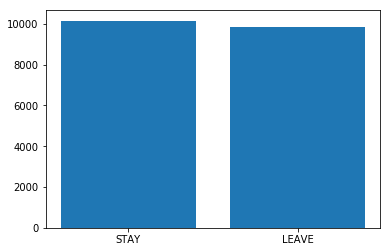

In [6]:
churn = df['LEAVE'].value_counts().to_dict()
plt.bar(churn.keys(), churn.values())
print('Number of customers left: {}'.format(churn['STAY']))
print('Number of customers stayed: {}'.format(churn['LEAVE']))

#### Finding:
+ The STAY to LEAVE ratio is around 50:50. We have a balanced dataset

2. Next, we will look into the distribution of all numerical features

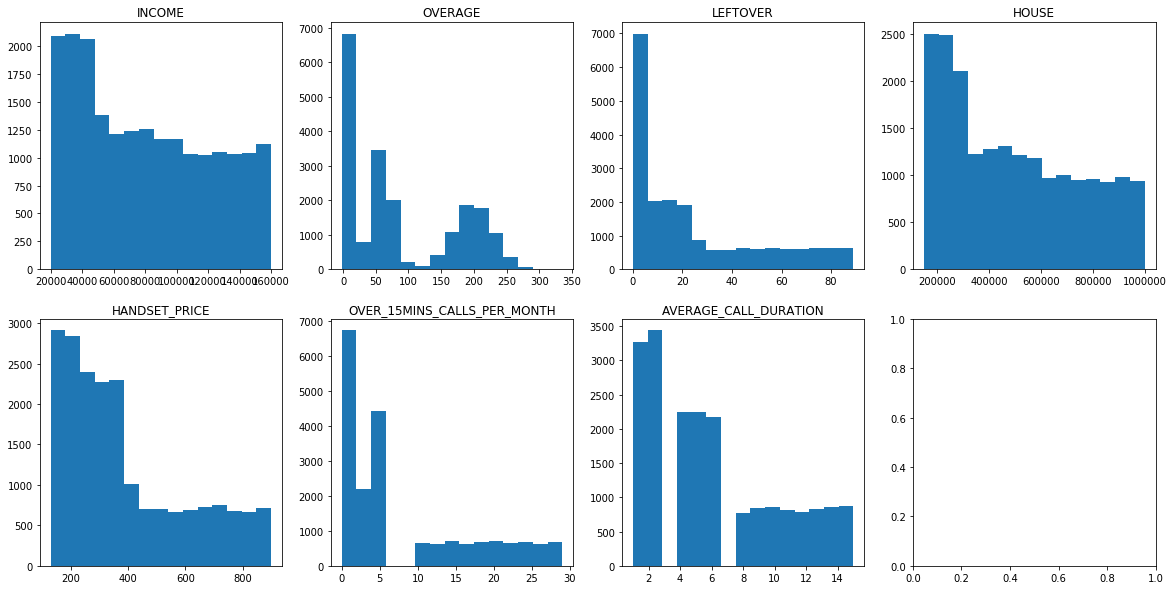

In [7]:
numeric_columns = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']

f, a = plt.subplots(2, 4, figsize=(20, 10))
a = a.ravel()
for idx, ax in enumerate(a): # for each numerical variable, plot a histogram to check the distribution of their numerical values
    if idx < len(numeric_columns):
        ax.hist(df[numeric_columns[idx]], bins=15)
        ax.set_title(numeric_columns[idx])

#### Finding:
+ Most of the numerical data are right-skewed, having a long right tail

3. Next, let's see if there are significant differences in the values of these numerical variables between customers who left and customers who stayed.

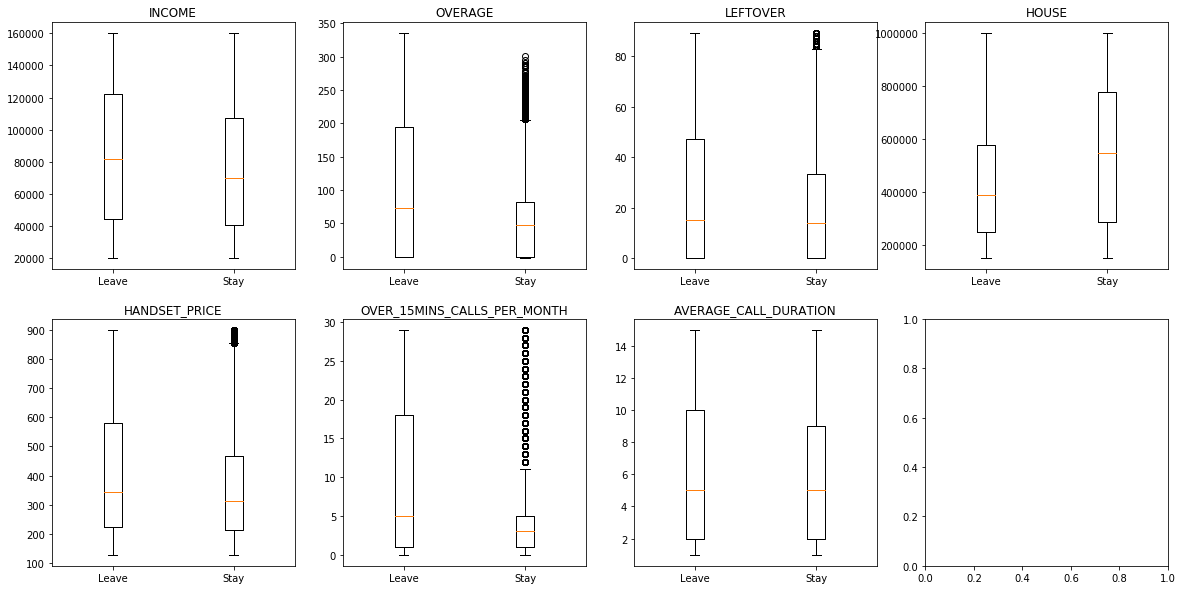

In [8]:
f1, a1 = plt.subplots(2, 4, figsize=(20, 10))
a1 = a1.ravel()

# for each numerical feature, use a boxplot to compare the distribution of data of leavers and that of stayers
for idx, ax in enumerate(a1): 
    if idx < len(numeric_columns):
        leave_values = df[df['LEAVE']=='LEAVE'][numeric_columns[idx]]
        stay_values = df[df['LEAVE']=='STAY'][numeric_columns[idx]]
        ax.boxplot([leave_values, stay_values])
        ax.set_xticklabels(['Leave', 'Stay'])
        ax.set_title(numeric_columns[idx])

#### Findings:
+ There are differences between the distribution of data for two groups of customers (leave/stay)
+ Customers who left have slightly higher individual income, while customers who stayed have higher household income
+ Overall, customers who left tend to have more overage, and they certainly make more long-duartion phone calls
+ On average, cell phones of customers who left are more expensive than that of customers who stayed

Since there are significant differences between leavers and stayers in terms of long-duration calls and overage, let's make more graphs to take a closer look at them

Text(0.5, 1.0, 'Overage by Group')

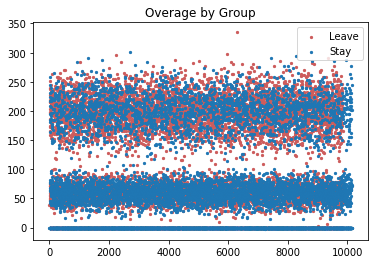

In [9]:
plt.scatter(range(df[df['LEAVE']=='LEAVE'].shape[0]), df[df['LEAVE']=='LEAVE']['OVERAGE'], c='IndianRed', s=5, label='Leave')
plt.scatter(range(df[df['LEAVE']=='STAY'].shape[0]), df[df['LEAVE']=='STAY']['OVERAGE'], c='C0', s=5, label='Stay')
plt.legend()
plt.title('Overage by Group')

As we can see from the scatter plot, dots indicating high overage values are more likely to be red

4. Now, lets take a look at the distribution of categorical features

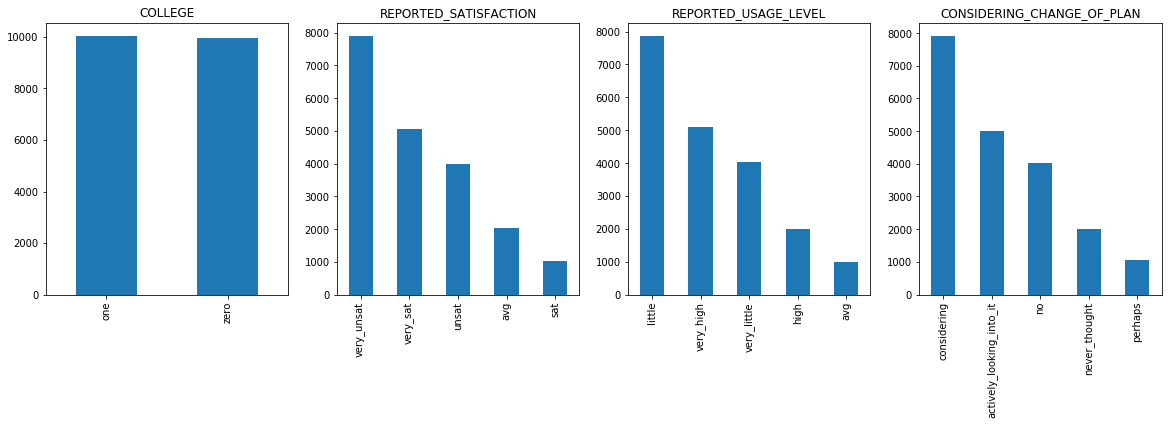

In [10]:
cat_columns = ['COLLEGE', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
df_cat = df[cat_columns]
f1, a1 = plt.subplots(1, 4, figsize=(20, 5))
a1 = a1.ravel()
for idx, ax in enumerate(a1): # for each categorical feature, plot the distribution of the responses
    df[cat_columns[idx]].value_counts().plot.bar(ax=a1[idx])
    ax.set_title(cat_columns[idx])

#### Findings:
+ College data is evenly distributed between two possible values
+ Reported satisfaction level are highly polarized. Most people are either very unsatisfied or very satisfied
+ Most people reported that they have little usage, while there is a considerable number of people said they used the service a lot
+ There is a large propotion of people are either considering changing their plan or looking into a new plan

5. Let's compare customers who left and customers who stayed by examining the same set of categorical features. However, since the amount of customers in these two groups are different, instead of comparing the counts, let's compare the percentages

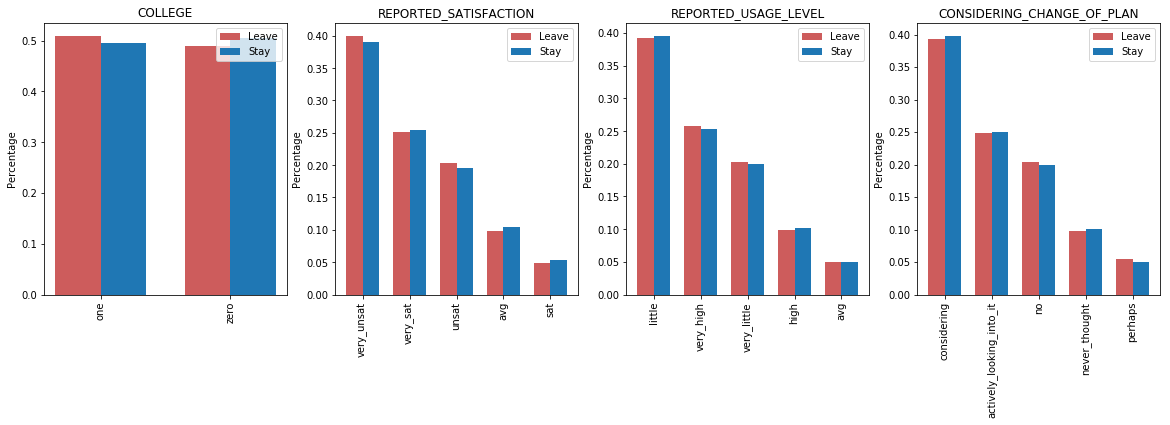

In [11]:
f2, a2 = plt.subplots(1, 4, figsize=(20, 5))
a2 = a2.ravel()
# for each categorical variable, plot a group bar chart to compare the distribution of responses of leavers and 
# that of stayers
for idx, ax in enumerate(a2):

    leave_value_counts = df[df['LEAVE']=='LEAVE'][cat_columns[idx]].value_counts().to_dict()
    stay_value_counts = df[df['LEAVE']=='STAY'][cat_columns[idx]].value_counts().to_dict()
    keys = df[cat_columns[idx]].value_counts().to_dict().keys()
    leave_perc = [leave_value_counts[key]/churn['LEAVE'] for key in keys]
    stay_perc = [stay_value_counts[key]/churn['STAY'] for key in keys]
    ind = np.arange(len(keys))
    width = 0.35  
    
    p1 = ax.bar(ind - width/2, leave_perc, width, color='IndianRed', label='Leave')
    p2 = ax.bar(ind + width/2, stay_perc, width, label='Stay')
    ax.set_title(cat_columns[idx])
    ax.set_ylabel('Percentage')
    ax.set_xticks(ind)
    ax.set_xticklabels(keys, rotation=90)
    ax.legend()

#### Findings:
+ Again, distributions of data between two groups of customers are very similar
+ More customers who left have college degrees
+ Customers who stayed are slightly less unsatisfied with our services
+ Customers who stayed are also more likely to consider changing plan. We are at high risk of losing them

6. Finally, let us check if we need to concern about multicollinearity

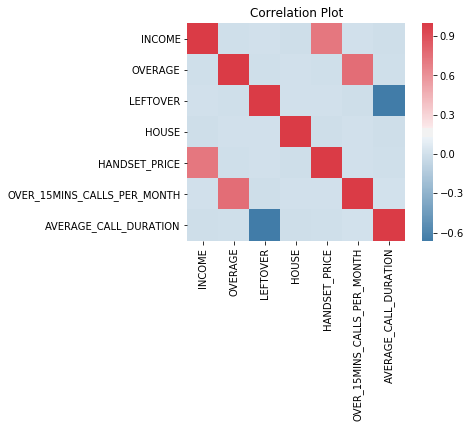

In [12]:
# check the correlation among all numerical features
cor = df[numeric_columns].corr(method='pearson')
fig, ax =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax)

#### Finding:
Correlations are high among the following variables:  
+ INCOME vs HANDSET_PRICE (positive correlation)
+ OVERAGE vs OVER_15MIN_CALLS_PER_MONTH (positive correlation)
+ LEFTOVER vs AVERAGE_CALL_DUARTION (negative correlation)

These make sense because  
+ Customers with higher income are more likely to buy more expensive phones
+ If you make more long-time phone calls, you are more likely to overuse the plan
+ If on average calls you make are shorted, you are more likely to have leftover

### Summary Insights from Preliminary Analysis
+ We have a __balanced__ dataset. The ratio of customers who left and customers who stayed is approximately 50:50
+ Most numerical features have distributions that are __right-skewed__, which means most users have low values in these attributes
+ Customers who left have higher individual income but lower household income. One possible explanation is customers who left are more likely to be __single or have smaller family__, while customers who stayed might be in bigger families
+ Customers who left have more overage and make more long-duration phone calls. They are also more willing to spend more on cell phones. It might imply that they are __heavy cell-phone users__ and they left because our plan ___does not___ meet their usage demand
+ It's __hard to distinguish__ customers who left from customers who stayed by simply looking at __responses of quetionnaires__, because the distributions of responses from two groups are similar
+ Customers who left are more likely to have __higher education__
+ We might need to watch for multicollinearity in our dataset

***
## Data Transformations

__[Note]__  
Since we have no null values, we don't need to impute our dataset  
Also, we chose not to standardized the data since most numerical data are in the same scale
### Create Dummies

In [13]:
for col in cat_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True) # create n-1 dummy variables for each categorical variable
                                                                   # n is the number of values in the categorical variable
    df = pd.concat([df, dummies], axis=1)

leave_dummy = pd.get_dummies(df['LEAVE'], prefix='LEAVE')['LEAVE_LEAVE']
df = pd.concat([df, leave_dummy], axis=1)

In [15]:
print('All columns in DataFrame: ')
print(df.columns.values)

All columns in DataFrame: 
['COLLEGE' 'INCOME' 'OVERAGE' 'LEFTOVER' 'HOUSE' 'HANDSET_PRICE'
 'OVER_15MINS_CALLS_PER_MONTH' 'AVERAGE_CALL_DURATION'
 'REPORTED_SATISFACTION' 'REPORTED_USAGE_LEVEL'
 'CONSIDERING_CHANGE_OF_PLAN' 'LEAVE' 'COLLEGE_zero'
 'REPORTED_SATISFACTION_sat' 'REPORTED_SATISFACTION_unsat'
 'REPORTED_SATISFACTION_very_sat' 'REPORTED_SATISFACTION_very_unsat'
 'REPORTED_USAGE_LEVEL_high' 'REPORTED_USAGE_LEVEL_little'
 'REPORTED_USAGE_LEVEL_very_high' 'REPORTED_USAGE_LEVEL_very_little'
 'CONSIDERING_CHANGE_OF_PLAN_considering'
 'CONSIDERING_CHANGE_OF_PLAN_never_thought'
 'CONSIDERING_CHANGE_OF_PLAN_no' 'CONSIDERING_CHANGE_OF_PLAN_perhaps'
 'LEAVE_LEAVE']


***
## Data Partitioning

In [16]:
input_columns = list(df.columns.values[1:8]) + list(df.columns.values[12:-1])
X = df[input_columns]
y = df.LEAVE_LEAVE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
print('Trainning data size: {}'.format(X_train.shape[0]))
print('Testing data size: {}'.format(X_test.shape[0]))

Trainning data size: 15000
Testing data size: 5000


***
## Model Building & Evaluation
Since we have a balanced dataset, we will use __accuracy__ as the main scoring criteria for comparisons across different models

### Baseline Model
One possible baseline model for this task is a majority class classifier. Let's apply a majority class classifer to our dataset and see what is the performance of it. Then, we will build a logistic regression model and a random forest classifier. Finally, we can compare these two models with our baseline model and select the one with the best performance

In [18]:
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
accuracy = 0

kf = KFold(n_splits=10, shuffle=True, random_state=0)
for train_indices, val_indices in kf.split(range(X_train.shape[0])): # use 10-fold cross validation to 
                                                                     # compute the average accuracy
    mc_clf = DummyClassifier()
    mc_clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    pred_labels = mc_clf.predict(X_train.iloc[val_indices])
    accuracy += np.mean(pred_labels == y_train[val_indices])

print('Accuracy rate of the baseline model (Majority Class Classifier) is : {}'.format(accuracy/10))

Accuracy rate of the baseline model (Majority Class Classifier) is : 0.5074000000000001


#### Validation Result:
The baseline performance we want to beat is an accuarcy score of __0.507__

### Logistic Regression
Let's build logistic regression models to classify customers as potential "leavers" or "stayers". We will use GridSearchCV with 10 folds and to tune hyperparameters and cross validate results. Then, we will use both accuracy rate and AUC to determine which set of hyperparameters is the best. Finally, we will report the best validation error for logistic regression based on the model we built using the best set of hyperparameters

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_lr = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']} # candidate hyperparameters
lr = LogisticRegression(solver='liblinear')

lr_cv_ac = GridSearchCV(lr, grid_lr, scoring='accuracy', cv=10) # use GridSearch CV to find best parameters
lr_cv_ac.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
print('Best parameters: C = {}; penalty = {}'.format(lr_cv_ac.best_params_['C'], lr_cv_ac.best_params_['penalty']))
print("Accuracy rate using best parameters: {}".format(lr_cv_ac.best_score_))

Best parameters: C = 0.1; penalty = l1
Accuracy rate using best parameters: 0.6366


In [21]:
lr_cv_auc = GridSearchCV(lr, grid_lr, scoring='roc_auc', cv=10) # change the scoring method to roc_auc
lr_cv_auc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [22]:
print('Best parameters: C = {}; penalty = {}'.format(lr_cv_auc.best_params_['C'], lr_cv_auc.best_params_['penalty']))
print("ROC AUC using best parameters: {}".format(lr_cv_auc.best_score_))

Best parameters: C = 0.1; penalty = l1
ROC AUC using best parameters: 0.6920115515639276


It turns out that using accuracy as scoring method and using roc_auc return the same set of hyperparameters: C=0.1; penalty=l1. Therefore, either of them will be our best logistic regression model.

In [23]:
best_lr_ac = lr_cv_ac.best_estimator_
best_lr_ac_coef = {X.columns.values[i] : best_lr_ac.coef_.ravel()[i] for i in range(len(X.columns.values))}
best_lr_ac_coef

{'INCOME': 3.0686356472849258e-06,
 'OVERAGE': 0.004914462841091578,
 'LEFTOVER': 0.00839285831501246,
 'HOUSE': -1.868011752946783e-06,
 'HANDSET_PRICE': 0.00044383058613688543,
 'OVER_15MINS_CALLS_PER_MONTH': 0.012571717688279934,
 'AVERAGE_CALL_DURATION': 0.025939218067972766,
 'COLLEGE_zero': -0.05193547140444143,
 'REPORTED_SATISFACTION_sat': -0.09085103942541374,
 'REPORTED_SATISFACTION_unsat': 0.05171730564489152,
 'REPORTED_SATISFACTION_very_sat': 0.0,
 'REPORTED_SATISFACTION_very_unsat': 0.038004390281330375,
 'REPORTED_USAGE_LEVEL_high': 0.0,
 'REPORTED_USAGE_LEVEL_little': 0.0,
 'REPORTED_USAGE_LEVEL_very_high': 0.0,
 'REPORTED_USAGE_LEVEL_very_little': 0.0,
 'CONSIDERING_CHANGE_OF_PLAN_considering': -0.03960229372810032,
 'CONSIDERING_CHANGE_OF_PLAN_never_thought': 0.003046491691423245,
 'CONSIDERING_CHANGE_OF_PLAN_no': 0.005822621092798831,
 'CONSIDERING_CHANGE_OF_PLAN_perhaps': 0.009407551982674664}

#### Intepretation of Coefficients
+ Coefficients for Unsatisfied and Very Unsatisfied are relatively large. People who left are more likely to report they are unsatisfied
+ On the contrary, coefficient for satisified is less than zero and large in absolute value, meaning satisfied customers are less likely to leave
+ Coefficients for Over 15 Min Calls and Average Call Duration are also relatively large, meaning that customers who used more of their voice call quotas are more likely to leave
+ Coefficient for not attending college is negative and large in absolute value, meaning that customers who did not go to college are more likely to stay

#### Validation Results
The logistic regression model we chose has an accuracy rate of __0.637__, which is a __27% increase__ compared with the baseline model


### Random Forest Classifier
By applying a logistic regression model, we can improve our accuracy rate by 27%. Let's try to train an ensemble model, such as Random Forest, to our data and see if we can still improve on that. This time, we will only use accuracy as scoring criteria, since we will eventually use that to compare with our baseline model. Again, use GridSearchCV to cross validate results in 10 folds and choose the best set of hyperparameters

In [24]:
from sklearn.ensemble import RandomForestClassifier

grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 4, 5], 'max_features': [5, 10, 15, None]} # candidate params
rf_clf = RandomForestClassifier()
rf_cv_ac = GridSearchCV(rf_clf, grid_rf, scoring='accuracy', cv=10)
rf_cv_ac.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 4, 5], 'max_features': [5, 10, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
print('Best parameters: Number of trees = {}; Maximum depth = {}; Max number of features: {}'
      .format(rf_cv_ac.best_params_['n_estimators'], rf_cv_ac.best_params_['max_depth'],
             rf_cv_ac.best_params_['max_features']))
print("Accuracy rate using best parameters: {}".format(rf_cv_ac.best_score_))

Best parameters: Number of trees = 50; Maximum depth = 4; Max number of features: None
Accuracy rate using best parameters: 0.7024666666666667


In [27]:
feature_names = X_train.columns.values
best_rf_ac = rf_cv_ac.best_estimator_
feature_importance_pairs = {feature_names[i] : best_rf_ac.feature_importances_[i] for i in range(
                            best_rf_ac.feature_importances_.shape[0])}
feature_importance_pairs 

# sort features by their importances

from operator import itemgetter

sorted_feature_importance_pairs = sorted(feature_importance_pairs.items(), reverse=True, key=itemgetter(1))
sorted_feature_importance_pairs
sorted_features = [feat for feat, imp in sorted_feature_importance_pairs]
sorted_importances = [imp for feat, imp in sorted_feature_importance_pairs]

For random forest classifier, we actually got two different sets of best parameters if we choose different scoring criteria for the model. In order to compare with the baseline model, we decided to go with the model we built based on best accuracy

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

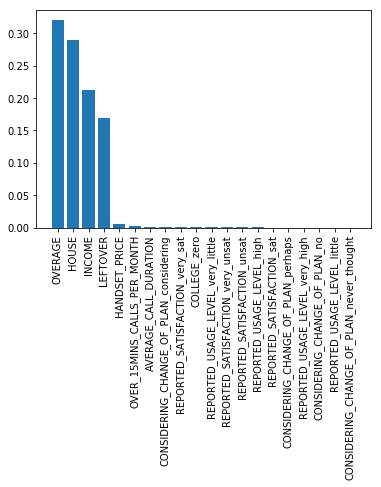

In [28]:
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)

#### Model Intepretation
It's more difficult to inteprete a Random Forest classifier. We can look at the most important features that could lead to improvement in the purity of data.  
OVERAGE, HOUSE, INCOME, and LEFTOVER are the top four most important features in our random forest model

#### Validation Results
We have an even bigger improvement by introducing an ensemble method. The accuracy rate on validation data is boosted to __0.702__, which is a __40% increase__ compared with baseline model and a __10% increase__ compared with the logistic regression model

### Final Choice
The logistic regression model is easier to inteprete, but it yields a lower accuracy score. Since the first goal is to build a good model to predict whether an unseen customer is leaving, we decide to choose the Random Forest Classifier, because it leads to the best accuracy rate. We have a 40% increase compared with the baseline model. We can still try to inteprete our findings in Exploratory Analysis and the logistic regression model, but it would be in the __Actionable Recommendation__ section

***
## Final Prediction on Test Data

In [29]:
from sklearn.metrics import accuracy_score

rf_y_pred = best_rf_ac.predict(X_test)
rf_test_score = accuracy_score(y_test, rf_y_pred)
print('Random Forest test accuracy rate: ', rf_test_score)

Random Forest test accuracy rate:  0.7042


The final report on accuracy score is __0.7042__

***
## Actionable Recommendations

1. Customer satisfaction level is very important because it affects whether a customer choose to stay. We need to improve customer satisfaction level to retain customers
2. Perform cost-benefit analysis to see if it worths to raise quota/offer promotions to retain customers with high overusage, since they are more likely to leave